## 1 전국 신규 민간 아파트 분양가격 동향

2013년부터  최근까지 부동산 가격 변동 추세가 아파트 분양가에 반영될까?

### 1.1 다루는 내용
- 공공데이터를 활용해 전혀 다른 두개의 데이터를 가져와서 전처리하고 병합하기
- 수치형과 범주형 데이터 시각화 


### 1.2 실습데이터 가져오기 

In [2]:
%ls data_apt

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 866A-7EEA

 C:\Users\김선림\data_apt 디렉터리

2022-09-07  오전 12:42    <DIR>          .
2022-09-07  오전 12:42    <DIR>          ..
2022-09-07  오전 12:42    <DIR>          상가상권정보
2022-09-07  오전 12:42    <DIR>          전국도시공원표준데이터
2022-09-07  오전 12:42    <DIR>          전국신규민간아파트분양가격동향
               0개 파일                   0 바이트
               5개 디렉터리  448,014,426,112 바이트 남음


In [3]:
#라이브러리 불러오기 
import pandas as pd

### 1.3 데이터셋

#### 1.3.1 전국 평균 분양가격(2013년9월~2015년 8월)

#### 1.3.2 주택도시보증공사_전국 평균 분양가격(2019년12월)

### 1.4 데이터 로드 

#### 1.4.1 최근파일로드

In [4]:
#최근 분양가 파일 로드 
#주택도시보증공사
df_last=pd.read_csv("data_apt/전국신규민간아파트분양가격동향/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv",encoding='cp949')
#인코딩 하는거 별표
df_last.shape

(4335, 5)

In [5]:
# head로 미리보기
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [6]:
# 뒷부분 미리보기
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


#### 1.4.2 2015년 부터 최근까지 데이터 로드 

In [7]:
#전국평균분양가격 로드
df_first=pd.read_csv("data_apt/전국신규민간아파트분양가격동향/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv",encoding='cp949')
df_first.shape

(17, 22)

In [8]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


#### 1.4.3 데이터 요약하기

In [9]:
df_last.info()
#4335개의 엔트리,5개 컬럼
#분양가격은 4058임 이것은 결측치때문에 적게나옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


#### 1.4.4 결측치 보기 

isnull혹은 isna로 결측치를 확인 할수 있다


In [10]:
#isnull로 결측치 구하기 
df_last.isnull().sum()
#True, False로 나옴 

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [11]:
#isna로 결측치 구하기
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

#### 1.4.5 데이터 타입 변경 

분양가격이 문자 타입으로 되어있는데 이것은 계산할수 없기에 수치데이터로 타입을 변환해야한다. 

In [12]:
df_last['분양가격(㎡)']
#숫자인데 오브젝트 형태임 그래서 수치데이터로 변환하기 
#astype은 공백이 있어서 에러가 생김 

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
4330    3882
4331     NaN
4332    3898
4333     NaN
4334    3601
Name: 분양가격(㎡), Length: 4335, dtype: object

In [13]:
# 데이터 타입 변환한것을 새로운 컬럼을 생성해서 넣어주기
df_last["분양가격"]=pd.to_numeric(df_last['분양가격(㎡)'],errors='coerce')
df_last['분양가격']
#float형태

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격, Length: 4335, dtype: float64

#### 1.4.6 평당분양가격 구하기 

분양가격을 평당 분양가격 기준으로 보기위해 3.3을 곱해서 '평당분양가격' 컬럼 만들기

In [14]:
df_last['평당분양가격']=df_last['분양가격']*3.3
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


#### 1.4.7 분양가격 요약하기 

In [15]:
df_last.info()
#바뀐 타입과 새로운 컬럼 확ㅇ인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [16]:
# 변경전 컬럼인 분양가격 (m)컬럼 요약 /기술통계값 보기 
df_last['분양가격(㎡)'].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [17]:
#분양가격 컬럼 요약 
df_last['분양가격'].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

#### 1.4.8 v규모구분을 전용면적 컬럼으로 변경

규모규분 컬럼은 전용면적에 대한 내용이있다. 그래서 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분 값에서 문구를 빼고 간결하게 만들어주기

In [18]:
df_last['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [19]:
df_last['전용면적']=df_last['규모구분'].str.replace('전용면적','')
df_last['전용면적']=df_last['전용면적'].str.replace('초과','~')
df_last['전용면적']=df_last['전용면적'].str.replace('이하','')
df_last['전용면적']=df_last['전용면적'].str.replace(' ','').str.strip() #앞뒤의 공백까지 제거 

df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

#### 1.4.9 필요없는 컬럼제거하기

In [20]:
#규모구분 drop
df_last=df_last.drop(['규모구분','분양가격(㎡)'],axis=1) #axis행 지정

In [21]:
df_last.info()
#전처리 했더니 메모리 사용량 줄어듬 (효율적)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


### 1.5 groupby로 데이터 집계

In [22]:
#groupby는 시리즈 형태로 나옴
#지역명별 평균
df_last.groupby(['지역명']).mean()
#지역명별 평당 분양가격만 평균
df_last.groupby(['지역명'])['평당분양가격'].mean()


지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [23]:
#전용면적으로 분양가격 평균 구하기
df_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [24]:
#지역명, 전용면적으로 평당분양가격 평균구하기(두개 그룹화)
df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().unstack().round()
#unstack() 은 두번째 인덱스가 컬럼값으로 지정
#round()소수점 지우기

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [25]:
#연도 , 지역명으로 평당 분양가격 평균구하기
g=df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.94,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.97,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7273.560000,12304.98,8786.760000,8280.800000,9613.977551,12206.700000,9957.158491,11560.680,21831.060,9132.505556,10666.935714,11640.600000,7372.920000,7398.973585,12566.730000,8198.422222,7473.120
2018,8219.255000,14258.42,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.54,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


### 1.6 pivot table로 집계하기 
- 그룹화 했던것을 피봇테이블로 똑같이 해보깅

In [26]:
pd.pivot_table(df_last, index=['지역명'],values=['평당분양가격'],aggfunc='sum')
#aggfunc 기본값은 평균

,평당분양가격
지역명,
강원,1909561.5
경기,3339223.8
경남,2289388.2
경북,2018745.3
광주,2000258.7
대구,2899376.7
대전,2030160.0
부산,3021780.3
서울,5899994.1


In [27]:
#전용면적으로 분양가격 평균 구하기

pd.pivot_table(df_last, index=['전용면적'],values=['평당분양가격'],aggfunc='mean')

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [28]:
#지역명, 전용면적으로 평당분양가격 평균구하기(두개 그룹화)
pd.pivot_table(df_last, index=['지역명'], columns=['전용면적'],values=['평당분양가격'],aggfunc='mean')

평당분양가격                                                        
전용면적         102㎡~           60㎡       60㎡~85㎡      85㎡~102㎡            전체
지역명                                                                       
강원     8311.380000   7567.098000   7485.588000   8749.557143   7477.536000
경기    14771.790000  13251.744000  12523.566000  13677.774000  12559.602000
경남    10358.363265   8689.175000   8618.676000  10017.612000   8658.672000
경북     9157.302000   7883.172000   8061.372000   8773.814634   8078.532000
광주    11041.532432   9430.666667   9910.692000   9296.100000   9903.630000
대구    13087.338000  11992.068000  11778.690000  11140.642857  11771.298000
대전    14876.871429   9176.475000   9711.372000   9037.430769   9786.018000
부산    13208.250000  11353.782000  11864.820000  12072.588000  11936.166000
서울    23446.038000  23212.794000  22786.830000  25943.874000  22610.346000
세종    10106.976000   9323.927027   9775.458000   9847.926000   9805.422000
울산     9974.448000   9202.106897  10502.531707   8861.007692  10492.712195
인천    14362.030435  11241.318000  11384.406000  11527.560000  11257.026000
전남     8168.490000   7210.170000   7269.240000   7908.862500   7283.562000
전북     8193.570000   7609.932000   7271.352000   8275.781250   7292.604000
제주    10522.787234  14022.221053  10621.314000  10709.082353  10784.994000
충남     8689.169388   7911.156000   7818.954000   9120.045000   7815.324000
충북     8195.352000   7103.118000   7264.488000   8391.306000   7219.014000

### 1.7 최근 데이터 시각화 하기

#### 1.7.1 데이터시각화를 위한 폰트 설정

In [29]:
#한글 폰트 사용을 위해 matplotlib의 pyplot불러오기 
import matplotlib.pyplot as plt

plt.rc ('font',family='Malgun Gothic')

#### 1.7.2 pandas로 시각화하기 -선그래프와 막대그래프 

<AxesSubplot:xlabel='지역명'>

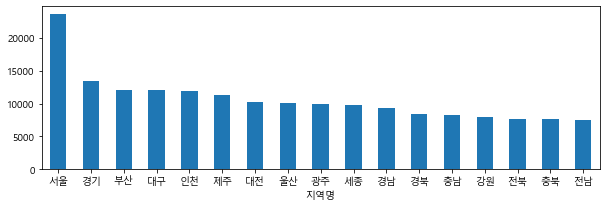

In [30]:
#지역명으로 분양가격의 평균을 구하고 선그래프로 시각화 하기 
g=df_last.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
g.plot(kind='bar', rot=0, figsize=(10,3))
#플롯에 옵션을 설정 하면 원하는 막대 그래프로 만들 수 있음
#sort_values() 정렬,sort_values(ascending=False) 놓은 순으로 정렬
#rot는 누워있는 글자 똑바로 
#figsize는 그래프 넓게 사이즈 설정

<AxesSubplot:xlabel='전용면적'>

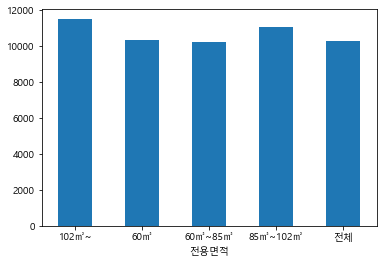

In [31]:
#전용면적으로 분양가격의 평균구하기
df_last.groupby(['전용면적'])['평당분양가격'].mean().plot.bar(rot=0)

<AxesSubplot:xlabel='연도'>

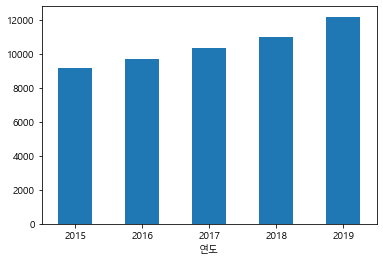

In [32]:
#연도별 분양가격 평균구하기
df_last.groupby(['연도'])['평당분양가격'].mean().plot.bar(rot=0)

#### 1.7.3 box-and-whisker plot | diagram

- 최솟값, 제1사분위 수 ,제 2사분위수(중앙값), 제3사분위수, 최댓값

<AxesSubplot:>

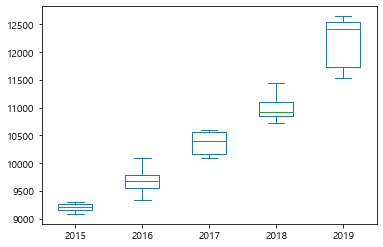

In [33]:
#연도의 월별 평당 분양가격
df_last.pivot_table(index='월',columns='연도',values='평당분양가격').plot.box()

<AxesSubplot:>

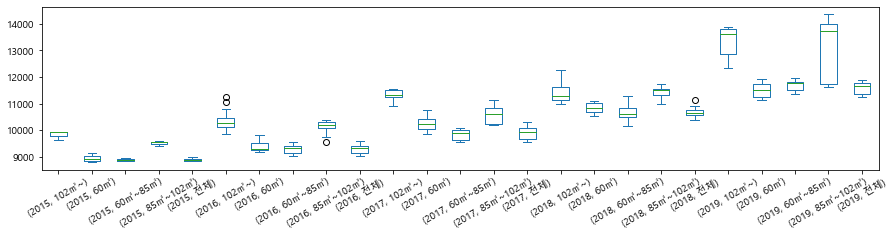

In [34]:
#월별 연도&전용면적별 평당분양가격
p=df_last.pivot_table(index='월',columns=['연도','전용면적'],values='평당분양가격')
p.plot.box(figsize=(15,3),rot=30)

<AxesSubplot:xlabel='월'>

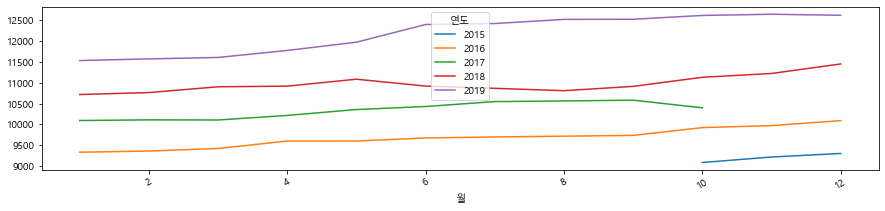

In [35]:
p=df_last.pivot_table(index='월',columns=['연도'],values='평당분양가격')

p.plot(figsize=(15,3),rot=30)

#### 1.7.4 seaborn으로 시각화 해보기

In [36]:
import seaborn as sns
%matplotlib inline

#씨본의 장점은 내부에서 통계적 연산을 해줌 
#원래는 그룹바이나 피봇으로 연산을 직접 해줬음

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

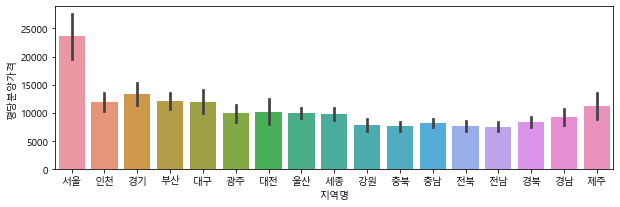

In [37]:
# barplot 으로 지역별 평당분양가격

plt.figure(figsize=(10,3))
sns.barplot(data=df_last, x='지역명',y='평당분양가격',ci='sd')
#ci는 5퍼센트 이상치를 제거한 95퍼센트 값으로 샘플링
#ci=sd는 표준편차값 > 표준편차를 확인 가능 
#ci=none 그리는거 X

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

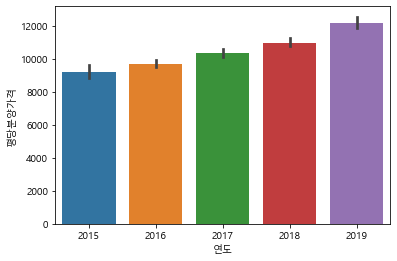

In [38]:
#barplot으로 연도별 평당분양가격

sns.barplot(data=df_last, x='연도',y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

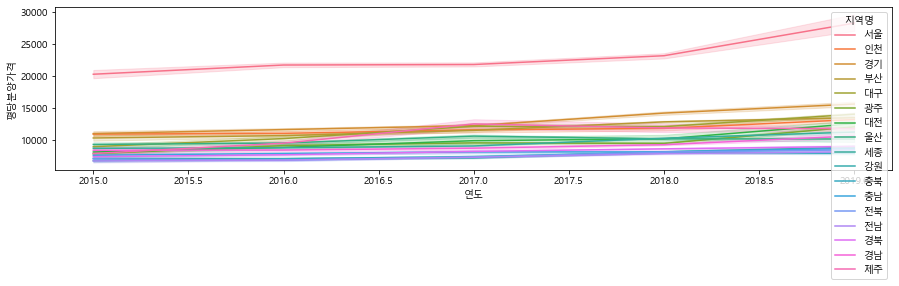

In [39]:
#lineplot으로 연도별 평당분양가격
#hue로 지역별 다르게 표시
plt.figure(figsize=(15,3))
sns.lineplot(data=df_last, x='연도',y='평당분양가격',hue='지역명')

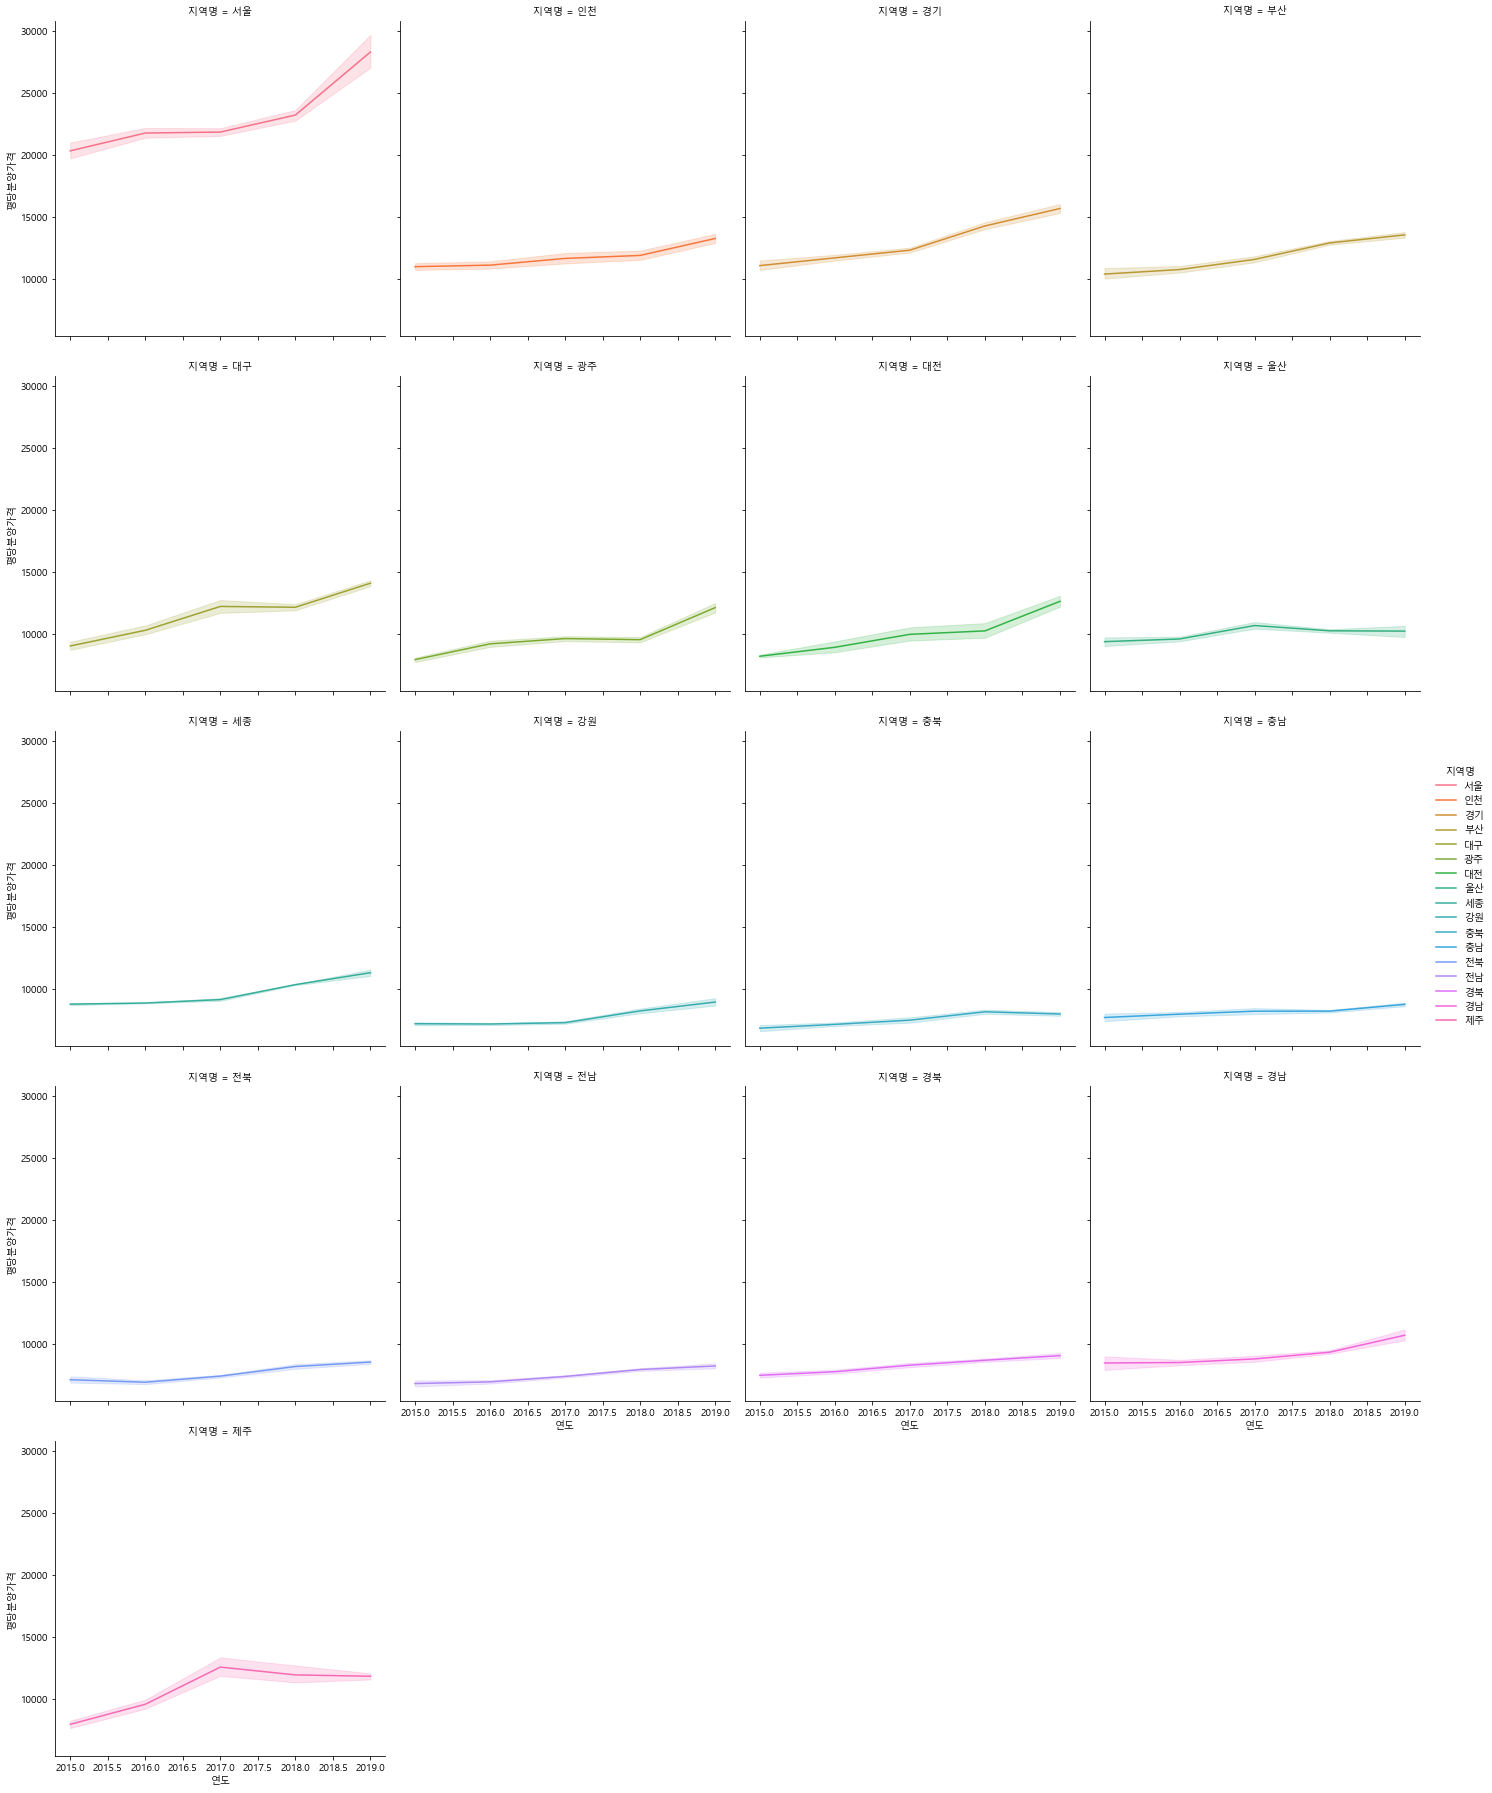

In [40]:
sns.relplot(data=df_last, x='연도',y='평당분양가격',hue='지역명',kind='line',col='지역명',col_wrap=4)

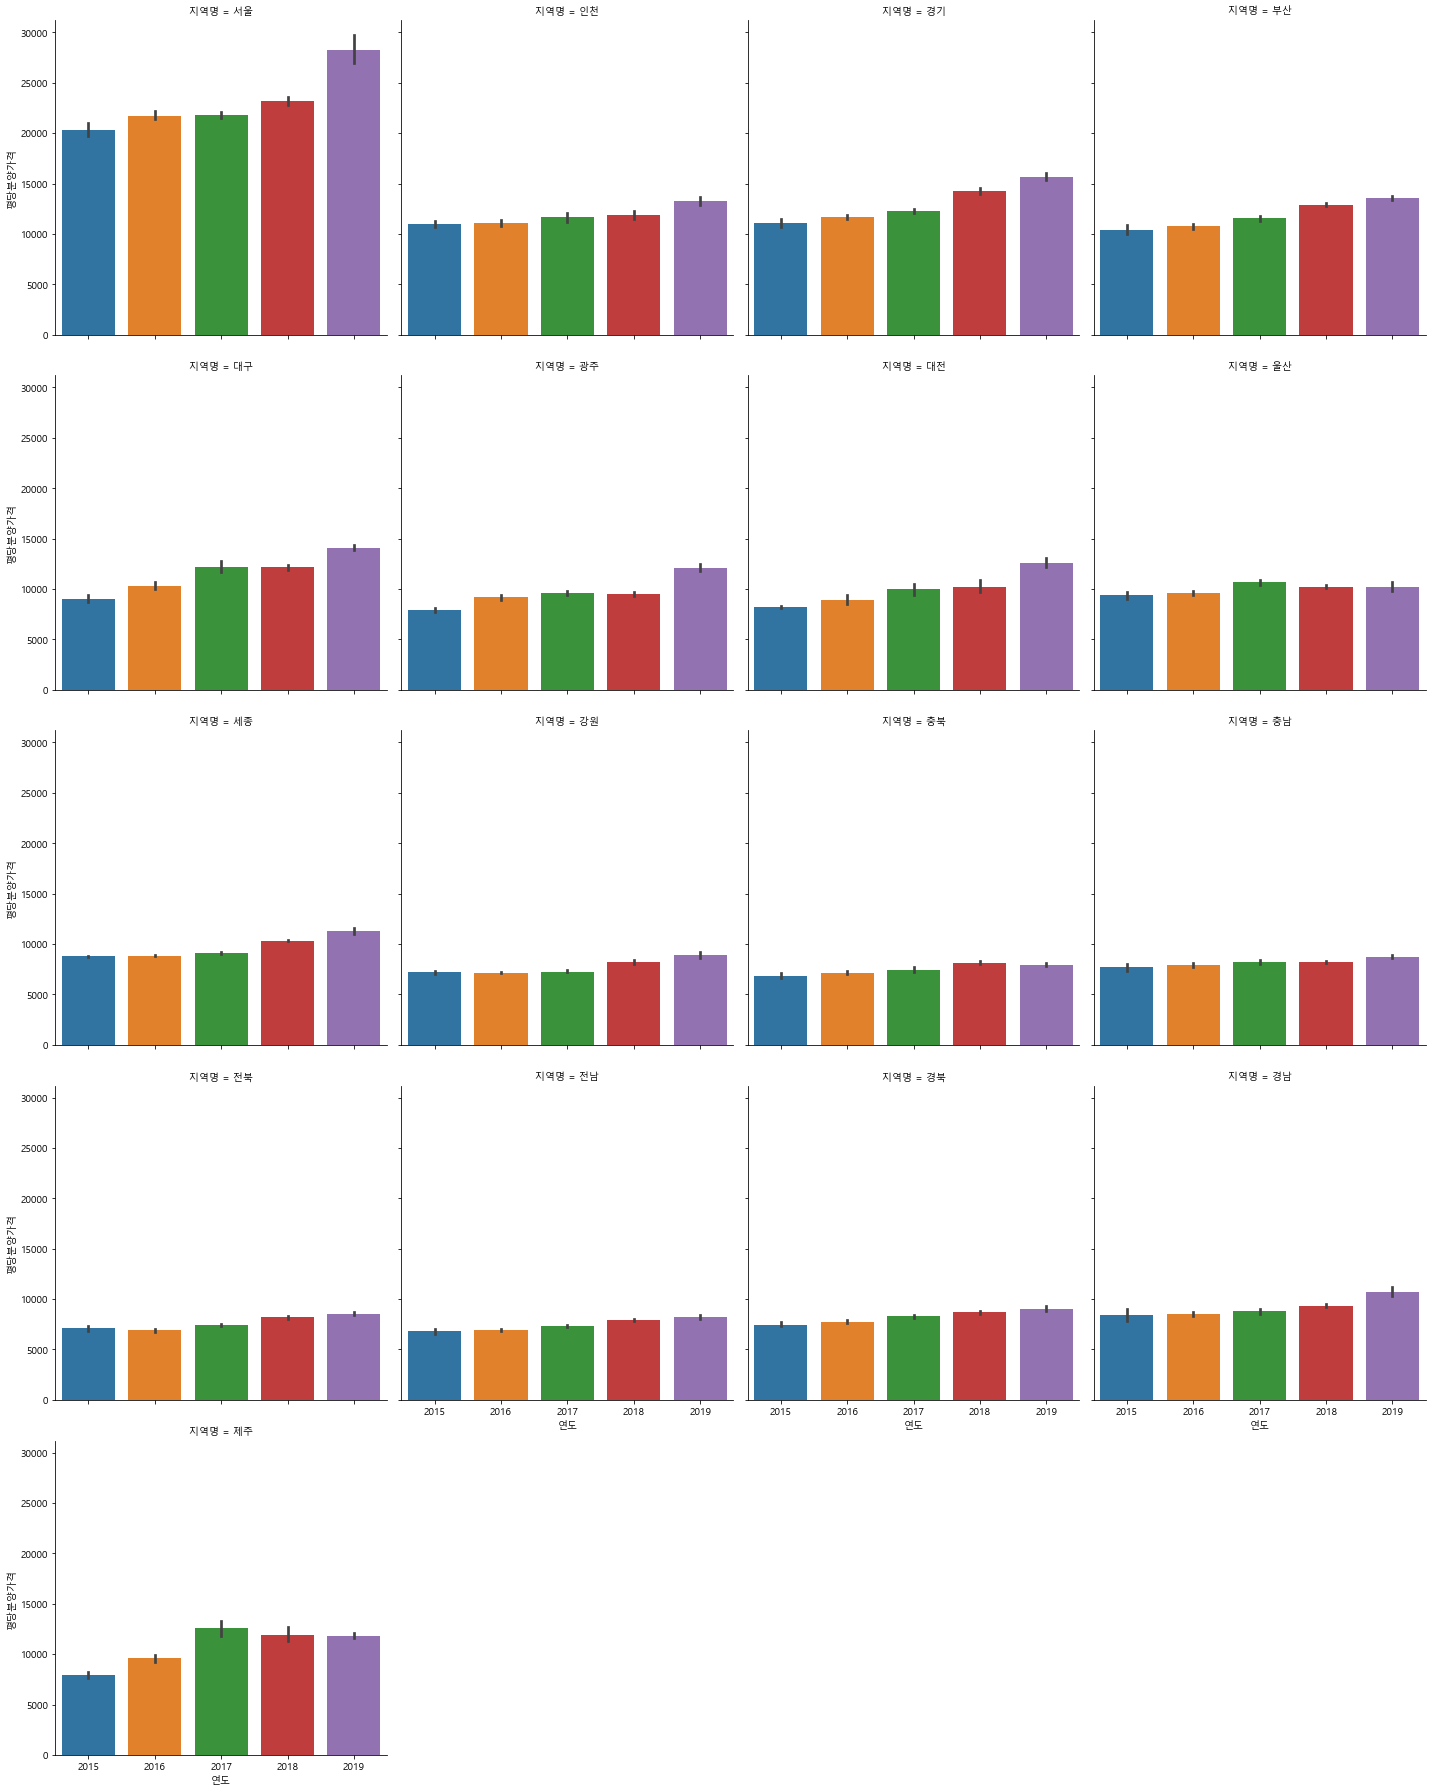

In [41]:
#연도별 평당분양가격 catplot

sns.catplot(data=df_last, x='연도',y='평당분양가격',kind='bar',col='지역명',col_wrap=4)

#### 1.7.5 boxplot, violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

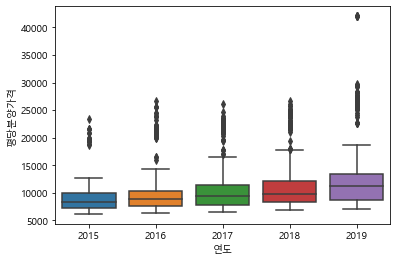

In [42]:
# 연도별 평당 분양가격 boxplot
sns.boxplot(data=df_last,x='연도',y='평당분양가격')
#데이터가 많고 적은지, 이상치 확인가능

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

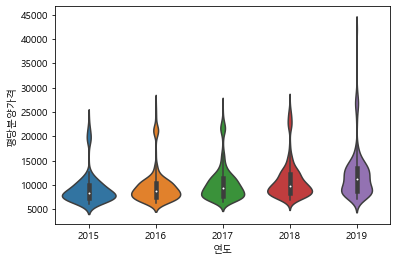

In [43]:
# 연도별 평당 분양가격 violinplot
sns.violinplot(data=df_last,x='연도',y='평당분양가격')
# 값의 분포를 확인 할 수 있음

#### 1.7.6 lmplot과 swarmplot

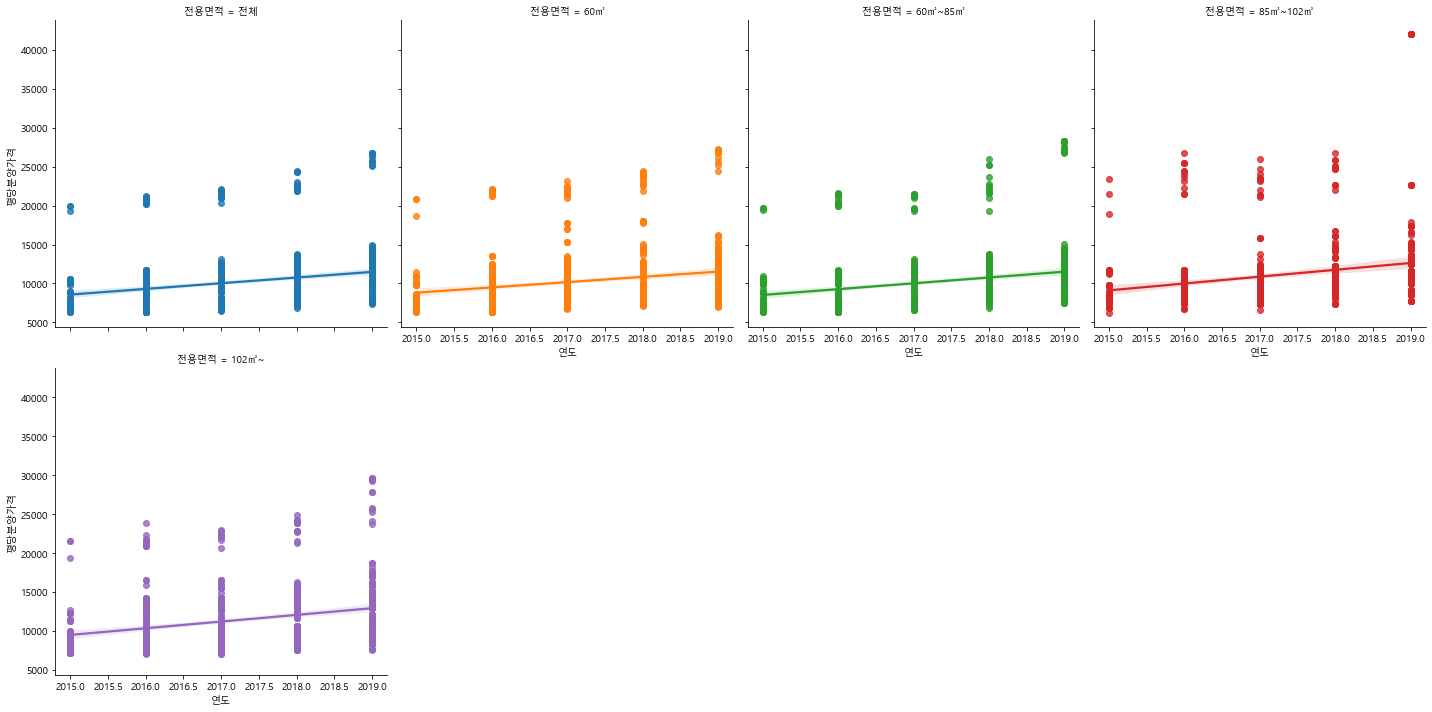

In [44]:
#연도별 평당분양가격 lmplot으로 그리기

sns.lmplot(data=df_last,x='연도',y='평당분양가격',hue='전용면적',col='전용면적',col_wrap=4) 

##scatterplot에 회귀선을 표현 
#col='전용면적',col_wrap=4 겹치지 않고 나눠서 표현 

C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

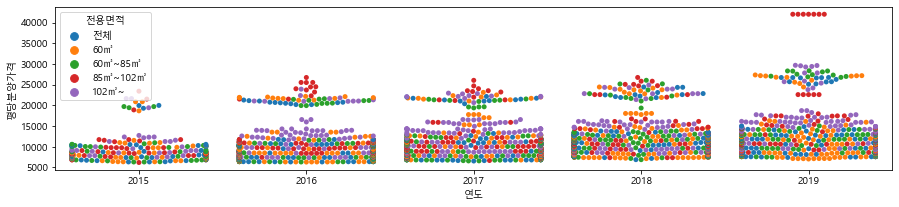

In [45]:
#연도별 평당분양가격 swarmplot으로 그리기
plt.figure(figsize=(15,3))

sns.swarmplot(data=df_last,x='연도',y='평당분양가격', hue='전용면적') 


#### 1.7.7 이상치보기

In [46]:
df_last['평당분양가격'].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [47]:
#평당분양가격의 최대값을 구해서 max_price라는 변수에 담기 
max_price=df_last['평당분양가격'].max()
max_price


42002.399999999994

In [48]:
#서울의 평당분양가격이 특히 높은 데이터가 있다. 해당 데이터를 가져와라
df_last[df_last['평당분양가격'] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


#### 1.7.8 수치데이터 히스토그램 그리기

distlpot는 결측치가 있으면 그래프에 오류가 난다. 그래서 결츠치가 아닌 데이터만 따로 모아서 평당 분양가격을 시각화 하기 위한 데이터를 만들어야한다. 데이터 프레임의 .loc를 활용하여 결측치가 없는 데이터에서 평당 분양가격만 가져온다.

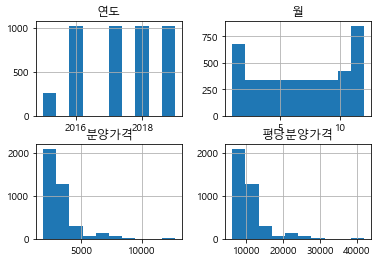

In [49]:

h=df_last.hist(bins=10) #전체

In [50]:
#결측치가 없는 데이터에서 평당 분양가격만 가져온다. 그리고 price변수에 담는다
price=df_last.loc[df_last['평당분양가격'].notnull(),'평당분양가격']

#df_last[df_last['평당분양가격'].notnull() ]결측치 제거
#.loc 하면 전체 중에서 평당분양가격만 가져옴

C:\Users\sun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

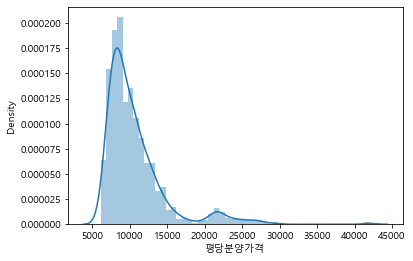

In [51]:
sns.distplot(price)

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

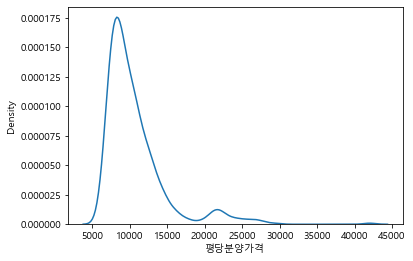

In [52]:
sns.kdeplot(price)

In [53]:
df_last['전용면적'].value_counts()

전체          867
60㎡         867
60㎡~85㎡     867
85㎡~102㎡    867
102㎡~       867
Name: 전용면적, dtype: int64

### 1.8 2015년 8월 이전 데이터 보기

In [54]:
# 중간에 ...으로 가려진 데이터 다 보기
pd.options.display.max_columns=100

In [55]:
df_last.head()

# last와 head의 컬럼이 다름

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [130]:
#df_first 변수에 담겨있는 정보보기
#df_first.info()

df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [57]:
# 결측치 확인 
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

#### 1.8.1 melt로 Tidy data 만들기

In [58]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


- last와 병합하기 위해 first에 melt를 써서 컬럼 맞추기

In [59]:
#pd.melt를 사용해 녹인 데이터는 df_first_melt 변수에 담기

df_first_melt=df_first.melt(id_vars='지역',var_name='기간',value_name='평당분양가격')
df_first_melt

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [60]:
df_first_melt.columns=['지역명','기간','평당분양가격']
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


#### 1.8.2 연도와 월을 분리하기

In [61]:
date='2013년12월'
date

'2013년12월'

In [62]:
#split을 통해 '년'을 기준으로 텍스트를 분리하기
date.split('년')
#리스트형태로 변환

['2013', '12월']

In [63]:
#리스트의 인덱싱을 사용해서 연도만 가져오기
date.split('년')[0]

'2013'

In [64]:
#리스트의 인덱싱을 replace를 사용해서 월을 제거
date.split('년')[-1].replace('월','')

'12'

In [65]:
#parse_year 라는 함수 만들기
#연도만 반환하도록 하며 반환하는 데이터는 int타입 되기

def parse_year(date):
    year=date.split('년')[0]
    year=int(year)  #int로 반환
    return year

y=parse_year(date)
print(type(y))
y

<class 'int'>


2013

In [66]:
# 제대로 분리가 되었는지 parse_year함수를 확인 
parse_year(date)

2013

In [67]:
#parse_month 라는 함수 만들기
#연도만 반환하도록 하며 반환하는 데이터는 int타입 되기 

def parse_month(date):
    month=date.split('년')[-1].replace('월','')
    month=int(month)
    return month

In [68]:
parse_month(date)

12

In [69]:
#df_first_melt 변수에 담긴 데이터 프레임에서
#apply를 활용해 연도만 추출해서 새로운 컬럼에 담기 

df_first_melt['연도']=df_first_melt['기간'].apply(parse_year)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [70]:
#df_first_melt 변수에 담긴 데이터 프레임에서
#apply를 활용해 월만 추출해서 새로운 컬럼에 담기 

df_first_melt['월']=df_first_melt['기간'].apply(parse_month)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [71]:
#df_last 와 병합을 하기 위해서는 컬럼의 이름이 같아야한다.
#sample을 활용해서 데이터를 미리보기하기
df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
3587,부산,2019,4,3917.0,12926.1,60㎡~85㎡


In [74]:
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [76]:
cols=['지역명','연도','월','평당분양가격']

In [78]:
# 최근 데이터가 담긴  df_last에는 전용면적이 있습니다.
# 이전 데이터에는 전용면적이 없기 때문에 ' 전체'만 사용하도록 합니다
#loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare변수에 담기
df_last_prepare=df_last.loc[df_last['전용면적'] =='전체',cols].copy()
df_last_prepare
#필요한 컬럼들만 가져오기
#copy로 데이터 복사 >>이전 데이터에는 영향을 안줌

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [85]:
#df_first_melt에서 공통된 컬럼만 가져오기
#copy로 복사해서 df_first_prepare컬럼에 담기

df_first_prepare=df_first_melt[cols].copy()
df_first_prepare

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


### 1.8.3 concat으로 데이터 합치기 

In [86]:
#데이터 합치기

df=pd.concat([df_first_prepare, df_last_prepare])
df
#2013~2019년까지 4개의 컬럼으로 구성된 데이터 프레임 생성

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [87]:
df.shape

(1224, 4)

In [88]:
#연도별로 데이터 개수 확인 
df['연도'].value_counts()

2014    204
2016    204
2017    204
2018    204
2019    204
2015    187
2013     17
Name: 연도, dtype: int64

#### 1.8.4 pivot table사용하기

In [92]:
#연도를 인덱스로, 지역명을 컬럼으로 평당 분양가격을 피봇테이블로 그려보기
t=pd.pivot_table(df,index='연도',columns='지역명',values='평당분양가격')
t


지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.000000,10855.000000,6473.000000,6168.000000,6098.000000,8080.000000,8321.000000,8111.000000,18189.00,7601.000000,8090.000000,10204.000000,5678.000000,6282.000000,7674.000000,6365.000000,6589.000000
2014,6332.500000,10509.083333,6728.750000,6536.500000,7587.833333,8286.083333,8240.333333,9180.166667,18997.25,8085.333333,8361.666667,10074.833333,5718.916667,6362.333333,7855.166667,6681.583333,6620.000000
2015,6831.154545,10489.109091,7646.163636,7035.063636,7956.090909,8706.718182,8104.509091,9633.272727,19282.60,8641.227273,9273.336364,10276.845455,6109.263636,6623.290909,7465.327273,7024.490909,6699.572727
2016,7011.125000,11220.000000,7847.950000,7360.650000,8898.725000,10310.025000,8501.625000,10429.925000,20663.50,8860.500000,10208.550000,10532.500000,6488.625000,6417.950000,9129.175000,7330.675000,6770.225000
2017,7126.800000,11850.000000,8119.800000,7794.900000,9463.500000,11455.800000,9044.700000,11577.900000,21375.90,9135.300000,11345.100000,10736.700000,7187.700000,7057.800000,10830.900000,7456.200000,6762.600000
2018,7680.750000,13185.975000,9019.450000,8505.200000,9855.725000,12075.800000,10180.225000,12997.875000,22889.35,10354.850000,10241.400000,11273.900000,7789.100000,7625.750000,11890.725000,8012.675000,7874.075000
2019,8141.650000,14468.850000,9870.850000,8856.650000,11822.800000,13852.025000,11777.700000,13116.400000,26131.05,11078.925000,10022.100000,12634.875000,7902.400000,8196.650000,12137.950000,8606.950000,7574.600000


<AxesSubplot:xlabel='지역명', ylabel='연도'>

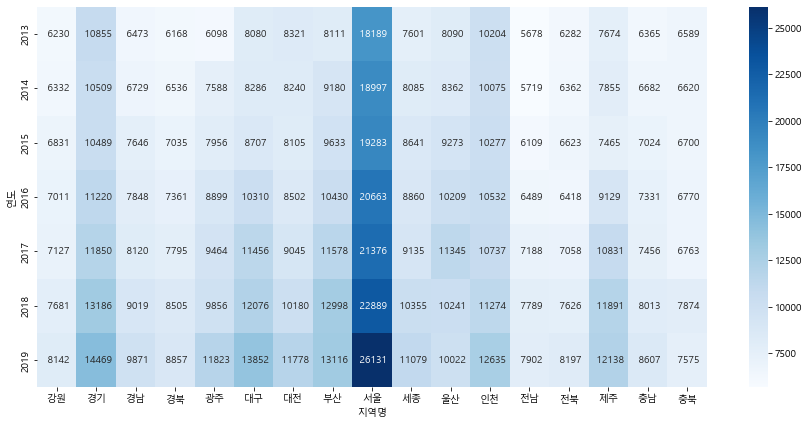

In [98]:
#위에서 그린 피봇테이블을 히트맵으로 표현
#표는 한눈에 안들어옴
#sns.heatmap(t_
plt.figure(figsize=(15,7))
sns.heatmap(t,cmap='Blues',annot=True,fmt=" .0f")
#annot그래프에 숫자 넣기

In [101]:
#transpose를 사용하면 행과 열 바꿀수 있음
t.transpose()

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.500000,6831.154545,7011.125,7126.8,7680.750,8141.650
경기,10855.0,10509.083333,10489.109091,11220.000,11850.0,13185.975,14468.850
경남,6473.0,6728.750000,7646.163636,7847.950,8119.8,9019.450,9870.850
경북,6168.0,6536.500000,7035.063636,7360.650,7794.9,8505.200,8856.650
광주,6098.0,7587.833333,7956.090909,8898.725,9463.5,9855.725,11822.800
대구,8080.0,8286.083333,8706.718182,10310.025,11455.8,12075.800,13852.025
대전,8321.0,8240.333333,8104.509091,8501.625,9044.7,10180.225,11777.700
부산,8111.0,9180.166667,9633.272727,10429.925,11577.9,12997.875,13116.400
서울,18189.0,18997.250000,19282.600000,20663.500,21375.9,22889.350,26131.050


<AxesSubplot:xlabel='연도', ylabel='지역명'>

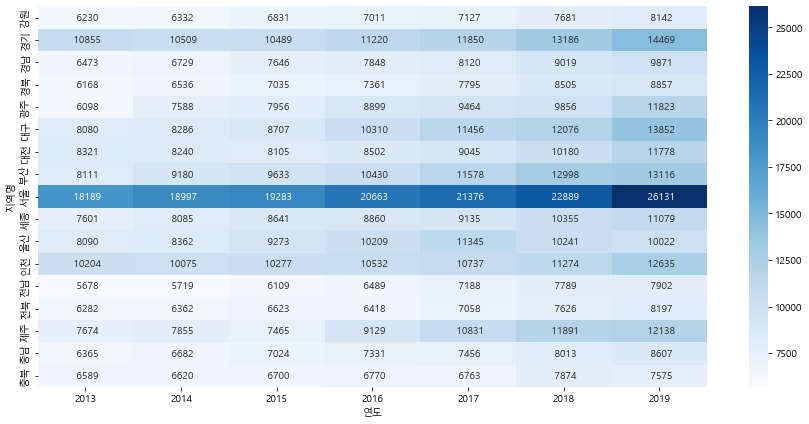

In [102]:
plt.figure(figsize=(15,7))
sns.heatmap(t.T,cmap='Blues',annot=True,fmt=" .0f")

#히트맵으로 그리면 어느지역이 높고 낮은지 한눈에 파악 가능

In [107]:
#그룹바이로 그려보기
df.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


### 1.9 2013년부터 최근 데이터까지 시각화

#### 1.9.1 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

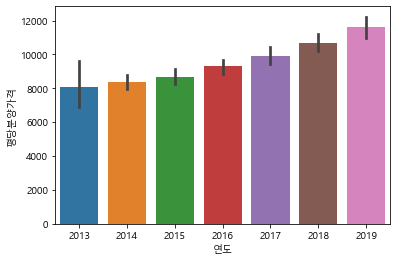

In [110]:
#barplot 
sns.barplot(data=df,x='연도',y='평당분양가격')


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

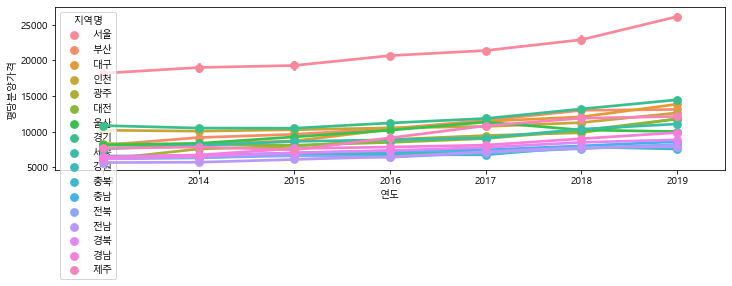

In [115]:
plt.figure(figsize=(12,3))
sns.pointplot(data=df,x='연도',y='평당분양가격',hue='지역명')

In [118]:
# 서울만 barplot으로 그리기
df_seoul=df[df['지역명']=='서울'].copy()
df_seoul

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
17,서울,2014,1,17925.0
34,서울,2014,2,17925.0
51,서울,2014,3,18016.0
68,서울,2014,4,18098.0
...,...,...,...,...
3910,서울,2019,8,26706.9
3995,서울,2019,9,26680.5
4080,서울,2019,10,26700.3
4165,서울,2019,11,26604.6


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

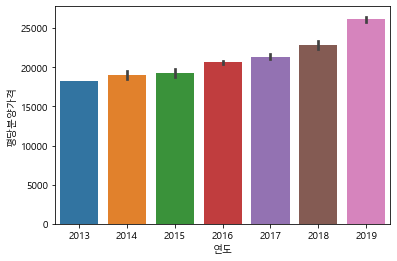

In [120]:
sns.barplot(data=df_seoul, x='연도',y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

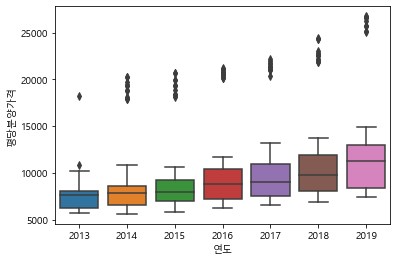

In [121]:
sns.boxplot(data=df,x='연도',y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

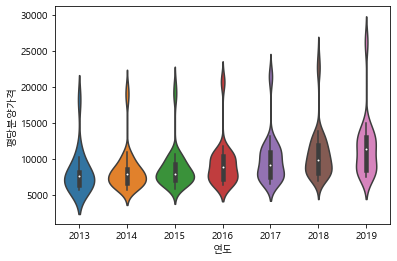

In [122]:
sns.violinplot(data=df,x='연도',y='평당분양가격')

C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.4% of the points cannot be

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

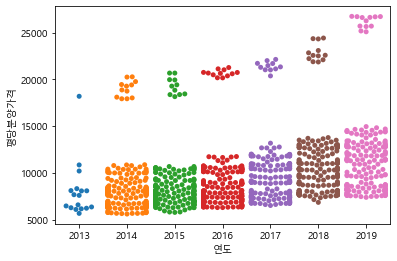

In [123]:
sns.swarmplot(data=df,x='연도',y='평당분양가격')

#### 1.9.2 지역별 평당 분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

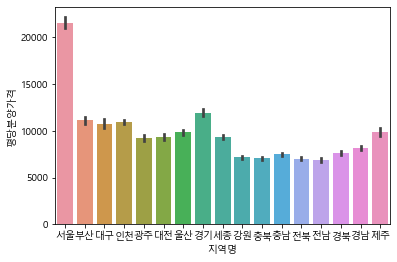

In [124]:
sns.barplot(data=df, x='지역명',y='평당분양가격')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

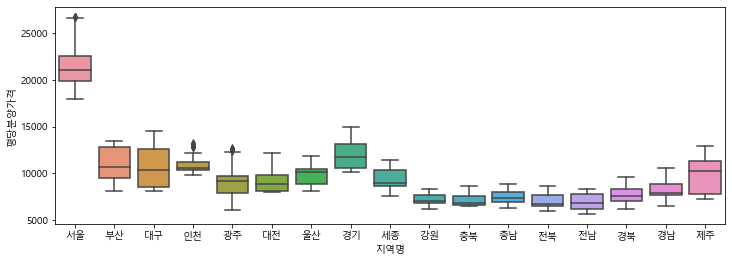

In [127]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='지역명',y='평당분양가격')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

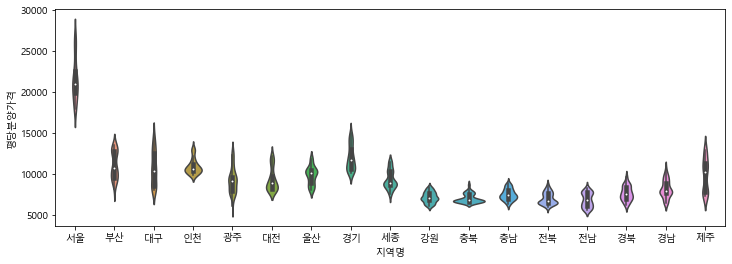

In [128]:
plt.figure(figsize=(12,4))
sns.violinplot(data=df, x='지역명',y='평당분양가격')

C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sun\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.9% of the points cannot be

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

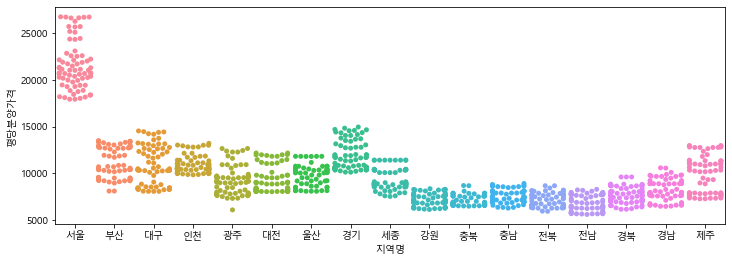

In [129]:
plt.figure(figsize=(12,4))
sns.swarmplot(data=df, x='지역명',y='평당분양가격')